In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import statsmodels.api as sm

from ISLP import load_data

from ISLP.models import (ModelSpec as MS,
                        summarize,
                        poly)

In [4]:
boston_df = load_data('Boston')

boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [5]:
predictons_cols = list(boston_df.columns.drop('crim'))

y = boston_df.crim

simple_lr_coefficients = list()

for col in predictons_cols:

    X = MS([col]).fit_transform(boston_df)

    result = sm.OLS(y, X).fit()

    print(f"crim ~ {col}")

    summarized_result = summarize(result)

    simple_lr_coefficients.append(result.params[col])

    print(f"{summarized_result}\n")

crim ~ zn
             coef  std err       t  P>|t|
intercept  4.4537    0.417  10.675    0.0
zn        -0.0739    0.016  -4.594    0.0

crim ~ indus
             coef  std err      t  P>|t|
intercept -2.0637    0.667 -3.093  0.002
indus      0.5098    0.051  9.991  0.000

crim ~ chas
             coef  std err      t  P>|t|
intercept  3.7444    0.396  9.453  0.000
chas      -1.8928    1.506 -1.257  0.209

crim ~ nox
              coef  std err       t  P>|t|
intercept -13.7199    1.699  -8.073    0.0
nox        31.2485    2.999  10.419    0.0

crim ~ rm
              coef  std err      t  P>|t|
intercept  20.4818    3.364  6.088    0.0
rm         -2.6841    0.532 -5.045    0.0

crim ~ age
             coef  std err      t  P>|t|
intercept -3.7779    0.944 -4.002    0.0
age        0.1078    0.013  8.463    0.0

crim ~ dis
             coef  std err       t  P>|t|
intercept  9.4993    0.730  13.006    0.0
dis       -1.5509    0.168  -9.213    0.0

crim ~ rad
             coef  std err  

All of the predictors seens to have a relationship with the response variable except for chas.

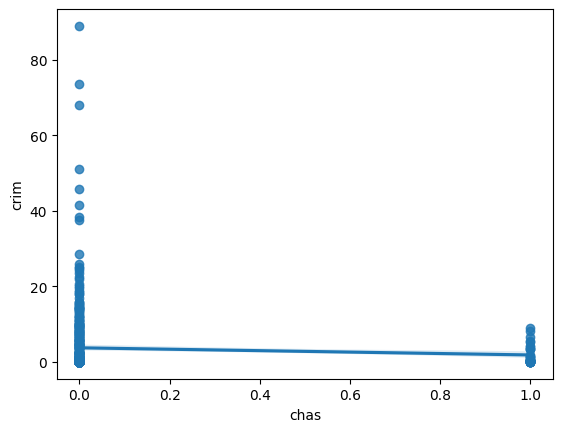

In [6]:
sns.regplot(x='chas', y='crim', data=boston_df)

plt.show()

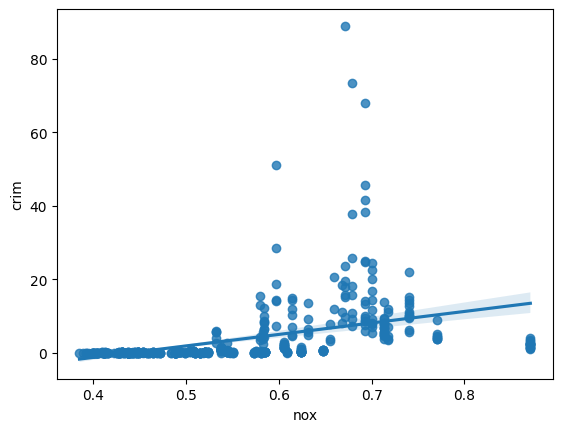

In [7]:
sns.regplot(x='nox', y='crim', data=boston_df)

plt.show()

## b)

In [8]:
predictons_cols = list(boston_df.columns.drop('crim'))

y = boston_df.crim

X = MS(predictons_cols).fit_transform(boston_df)

result = sm.OLS(y, X).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           2.03e-56
Time:                        22:50:34   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.7784      7.082      1.946      0.0

The predictor that have low p-value are dis and rad. We can reject the null hyphotesis for this predictors

## c)

In [9]:
mult_lr_coefficients = list()

for col in predictons_cols:
    mult_lr_coefficients.append(result.params[col])

In [10]:
coeff_df = pd.DataFrame({"pred": predictons_cols,
                         "simple_coeff": simple_lr_coefficients,
                         "mult_coeff": mult_lr_coefficients}
                         )

coeff_df

,pred,simple_coeff,mult_coeff
0,zn,-0.073935,0.045710
1,indus,0.509776,-0.058350
2,chas,-1.892777,-0.825378
3,nox,31.248531,-9.957587
4,rm,-2.684051,0.628911
5,age,0.107786,-0.000848
6,dis,-1.550902,-1.012247
7,rad,0.617911,0.612465
8,tax,0.029742,-0.003776
9,ptratio,1.151983,-0.304073


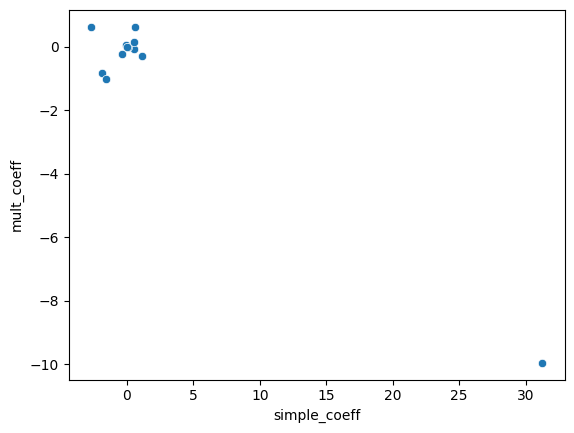

In [11]:
sns.scatterplot(x='simple_coeff', y='mult_coeff', data=coeff_df)

plt.show()

## d)

In [18]:
predictons_cols = list(boston_df.columns.drop('crim'))

y = boston_df.crim

simple_lr_coefficients = list()

for col in predictons_cols:

    X = MS([poly(col, degree=3)]).fit_transform(boston_df)

    result = sm.OLS(y, X).fit()

    print(f"crim ~ {col}")

    summarized_result = summarize(result)

    # simple_lr_coefficients.append(result.params[col])

    print(f"{summarized_result}\n")

crim ~ zn
                          coef  std err      t  P>|t|
intercept               3.6135    0.372  9.709  0.000
poly(zn, degree=3)[0] -38.7498    8.372 -4.628  0.000
poly(zn, degree=3)[1]  23.9398    8.372  2.859  0.004
poly(zn, degree=3)[2] -10.0719    8.372 -1.203  0.230

crim ~ indus
                             coef  std err       t  P>|t|
intercept                  3.6135    0.330  10.950  0.000
poly(indus, degree=3)[0]  78.5908    7.423  10.587  0.000
poly(indus, degree=3)[1] -24.3948    7.423  -3.286  0.001
poly(indus, degree=3)[2] -54.1298    7.423  -7.292  0.000

crim ~ chas
                                 coef       std err      t  P>|t|
intercept                9.971000e+12  2.100000e+13  0.475  0.635
poly(chas, degree=3)[0]  1.173000e+13  2.470000e+13  0.475  0.635
poly(chas, degree=3)[1]  1.249000e+14  2.630000e+14  0.475  0.635
poly(chas, degree=3)[2] -3.332000e+13  7.020000e+13 -0.475  0.635

crim ~ nox
                           coef  std err       t  P>|t|
inter